# **Experiment**: full algorithm of concent from smudged ground truth 4.1

In [1]:
import numpy as np
import os
import logging

from projects.lifting_v2.experiments.experimentC3.E1_run import run_experiment
from projects.lifting_v2.experiments.experimentC3.E2_post_processing import post_processing

from tools.exp_tools import Exp

logger = logging.getLogger(__name__)

In [2]:
# Experiment parameters
vol_smudge = 10
img_size = 129  # was 65 before and was 129 in rotation estimation paper
mr_repeat = 1 # number of times mesh refinement
snr = 1 / 16  # [1/2, 1/4, 1/8, 1/16, 1/32, 1/64, 1/128, 1/256]
num_imgs = 512 # 5000  # [512, 1024, 2048, 4096, 8192]

# tau1 = 5e-9
# tau2 = 1e-1 * tau1
# tau2 = 1e-9 * tau1
# tau2 = 1e-1 * tau1 / (129**4)
J0 = 6

# durations
# SNR16_L129_N8192_J6_r2_sX_i3 -> 10h
# SNR16_L129_N8192_J6_r1_sX_i3 -> 1.5h
max_iter = 3

# Directly start experiment
exp = Exp()

exp.begin(prefix="expC3" , postfix="SNR{}_L{}_N{}_J{}_r{}_s{}_i{}".format(int(1/snr), img_size, num_imgs, J0, mr_repeat, vol_smudge, max_iter))
# exp.begin(prefix="expC3" , postfix="SNR{}_L{}_N{}_J{}_r{}_s{}_i{}_t{}_tt{}".format(int(1/snr), img_size, num_imgs, J0, mr_repeat, vol_smudge, max_iter, int(-np.log(tau1)/np.log(10)), int(-np.log(tau2)/np.log(10)) ))
exp.dbglevel(4)

2022-03-01 17:10:37,162 INFO Results folder is /Users/wdiepeveen/Documents/PhD/Projects/2 - Cryo-EM/src/src/Cryo-EM/tools/../results/expC3_22-03-01_17-10-37_SNR16_L129_N512_J6_r1_s10_i3


In [3]:
# Set data path
data_dir = "data"
data_filename = "clean70SRibosome_vol_65p.mrc"
data_path = os.path.join("..", "..", "..", "..",data_dir, data_filename)

# Set results folder if skip_preprocessing
# results_folder = "results/expA2_21-10-10_12-30-19_L65_N512_r1_k90_lamV10_lamD-8"
# results_folder = "results/expA2_21-10-10_12-34-53_L65_N512_r2_k90_lamV10_lamD-8"
# results_folder = "results/expA2_21-10-10_13-08-24_L65_N512_r1_k90_lamV10_lamD-10"
# results_folder = "results/expA2_21-10-10_13-47-27_L65_N512_r2_k90_lamV10_lamD-10"  # "results/lifting_21-04-26_12-22-06"

In [4]:
# Experiment

logger.info("Start Experiment")
logger.info("Running Experiment for SNR = {} and {} images".format(snr, num_imgs))

run_experiment(exp=exp,
               max_iter=max_iter,
               num_imgs=num_imgs,
               snr=snr,
               img_size=img_size,
               mr_repeat=mr_repeat,
#                tau1=None, # tau1,
#                tau2=None, # tau2,
               J0=J0,
               data_path=data_path,
               vol_smudge=vol_smudge,
               )

2022-03-01 17:10:37,179 INFO Start Experiment
2022-03-01 17:10:37,180 INFO Running Experiment for SNR = 0.0625 and 512 images
2022-03-01 17:10:37,181 INFO This experiment illustrates orientation refinement using a lifting approach
2022-03-01 17:10:37,183 INFO Initialize simulation object and CTF filters.
2022-03-01 17:10:37,184 INFO Load 3D map and downsample 3D map to desired grids of 129 x 129 x 129.
2022-03-01 17:10:38,207 INFO Use downsampled map to creat simulation object.
2022-03-01 17:10:38,226 INFO Get true rotation angles generated randomly by the simulation object.
2022-03-01 17:10:39,001 INFO Trying NFFT backend finufft
2022-03-01 17:10:39,010 INFO NFFT backend finufft usable.
2022-03-01 17:10:39,011 INFO Trying NFFT backend cufinufft
2022-03-01 17:10:39,014 INFO NFFT backend cufinufft not usable:
	No module named 'pycuda'
2022-03-01 17:10:39,016 INFO Trying NFFT backend pynfft
2022-03-01 17:10:39,017 INFO NFFT backend pynfft not usable:
	No module named 'pynfft'
2022-03-01 

2022-03-01 17:14:35,107 INFO Projecting 512 vectors onto 14761-simplex at 9%
2022-03-01 17:14:35,184 INFO Projecting 512 vectors onto 14761-simplex at 19%
2022-03-01 17:14:35,262 INFO Projecting 512 vectors onto 14761-simplex at 29%
2022-03-01 17:14:35,340 INFO Projecting 512 vectors onto 14761-simplex at 39%
2022-03-01 17:14:35,420 INFO Projecting 512 vectors onto 14761-simplex at 48%
2022-03-01 17:14:35,496 INFO Projecting 512 vectors onto 14761-simplex at 58%
2022-03-01 17:14:35,581 INFO Projecting 512 vectors onto 14761-simplex at 68%
2022-03-01 17:14:35,664 INFO Projecting 512 vectors onto 14761-simplex at 78%
2022-03-01 17:14:35,743 INFO Projecting 512 vectors onto 14761-simplex at 87%
2022-03-01 17:14:35,824 INFO Projecting 512 vectors onto 14761-simplex at 97%
2022-03-01 17:14:35,852 INFO Projecting 512 vectors onto 14761-simplex at 100%
2022-03-01 17:14:35,890 INFO Computing 50 means of 318 points in at most 20 steps...
2022-03-01 17:14:35,957 INFO Computing 512 means at 9%
20

2022-03-01 17:18:23,348 INFO Projecting 512 vectors onto 14761-simplex at 9%
2022-03-01 17:18:23,433 INFO Projecting 512 vectors onto 14761-simplex at 19%
2022-03-01 17:18:23,518 INFO Projecting 512 vectors onto 14761-simplex at 29%
2022-03-01 17:18:23,604 INFO Projecting 512 vectors onto 14761-simplex at 39%
2022-03-01 17:18:23,693 INFO Projecting 512 vectors onto 14761-simplex at 48%
2022-03-01 17:18:23,785 INFO Projecting 512 vectors onto 14761-simplex at 58%
2022-03-01 17:18:23,878 INFO Projecting 512 vectors onto 14761-simplex at 68%
2022-03-01 17:18:23,962 INFO Projecting 512 vectors onto 14761-simplex at 78%
2022-03-01 17:18:24,047 INFO Projecting 512 vectors onto 14761-simplex at 87%
2022-03-01 17:18:24,133 INFO Projecting 512 vectors onto 14761-simplex at 97%
2022-03-01 17:18:24,167 INFO Projecting 512 vectors onto 14761-simplex at 100%
2022-03-01 17:18:24,227 INFO Computing 50 means of 321 points in at most 20 steps...
2022-03-01 17:18:24,287 INFO Computing 512 means at 9%
20

2022-03-01 17:22:35,368 INFO Projecting 512 vectors onto 14761-simplex at 9%
2022-03-01 17:22:35,445 INFO Projecting 512 vectors onto 14761-simplex at 19%
2022-03-01 17:22:35,522 INFO Projecting 512 vectors onto 14761-simplex at 29%
2022-03-01 17:22:35,598 INFO Projecting 512 vectors onto 14761-simplex at 39%
2022-03-01 17:22:35,676 INFO Projecting 512 vectors onto 14761-simplex at 48%
2022-03-01 17:22:35,753 INFO Projecting 512 vectors onto 14761-simplex at 58%
2022-03-01 17:22:35,831 INFO Projecting 512 vectors onto 14761-simplex at 68%
2022-03-01 17:22:35,909 INFO Projecting 512 vectors onto 14761-simplex at 78%
2022-03-01 17:22:35,987 INFO Projecting 512 vectors onto 14761-simplex at 87%
2022-03-01 17:22:36,063 INFO Projecting 512 vectors onto 14761-simplex at 97%
2022-03-01 17:22:36,091 INFO Projecting 512 vectors onto 14761-simplex at 100%
2022-03-01 17:22:36,145 INFO Computing 50 means of 317 points in at most 20 steps...
2022-03-01 17:22:36,193 INFO Computing 512 means at 9%
20

2022-03-01 17:22:53,804 INFO Start Postprocessing
2022-03-01 17:22:53,806 INFO Postprocessing started


/Users/wdiepeveen/PycharmProjects/Cryo-EM/lib/python3.6/site-packages/scipy/spatial/transform/rotation.py:135: UserWarning: Gimbal lock detected. Setting third angle to zero since it is not possible to uniquely determine all angles.
  warnings.warn("Gimbal lock detected. Setting third angle to zero since"


integrated (averaged) density = 1.0000000000013642
2022-03-01 17:22:55,107 INFO MSE deviation of the 1:th estimated GD-refined rotations using register_rotations : 0.22758232549811222
2022-03-01 17:22:55,235 INFO Substituting symbol X from STIXNonUnicode
2022-03-01 17:22:55,245 INFO Substituting symbol X from STIXNonUnicode


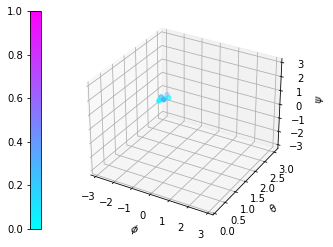

2022-03-01 17:22:55,590 INFO Substituting symbol X from STIXNonUnicode
2022-03-01 17:22:55,598 INFO Substituting symbol X from STIXNonUnicode


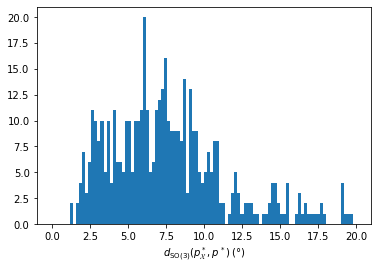

integrated (averaged) density = 0.9999999999999716
2022-03-01 17:22:55,874 INFO MSE deviation of the 2:th estimated GD-refined rotations using register_rotations : 0.033936359892767214
2022-03-01 17:22:56,056 INFO Substituting symbol X from STIXNonUnicode
2022-03-01 17:22:56,067 INFO Substituting symbol X from STIXNonUnicode


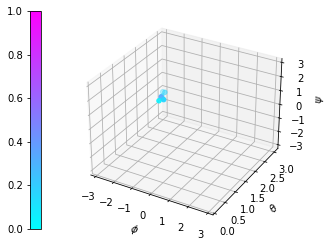

2022-03-01 17:22:56,425 INFO Substituting symbol X from STIXNonUnicode
2022-03-01 17:22:56,434 INFO Substituting symbol X from STIXNonUnicode


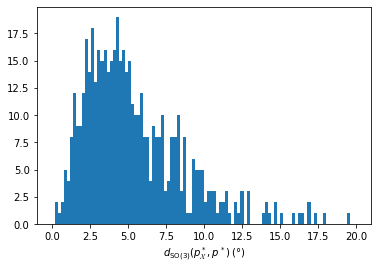

integrated (averaged) density = 0.9999999999998721
2022-03-01 17:22:56,714 INFO MSE deviation of the 3:th estimated GD-refined rotations using register_rotations : 0.015376022805629138
2022-03-01 17:22:56,839 INFO Substituting symbol X from STIXNonUnicode
2022-03-01 17:22:56,846 INFO Substituting symbol X from STIXNonUnicode


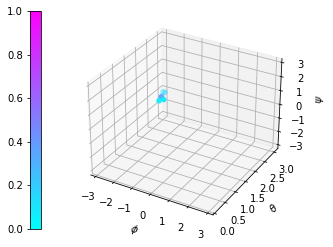

2022-03-01 17:22:57,182 INFO Substituting symbol X from STIXNonUnicode
2022-03-01 17:22:57,190 INFO Substituting symbol X from STIXNonUnicode


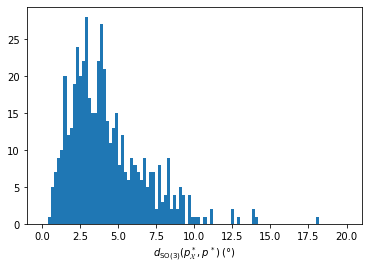

2022-03-01 17:22:57,343 INFO Substituting symbol X from STIXNonUnicode
2022-03-01 17:22:57,352 INFO Substituting symbol X from STIXNonUnicode
2022-03-01 17:22:57,479 INFO Substituting symbol X from STIXNonUnicode
2022-03-01 17:22:57,488 INFO Substituting symbol X from STIXNonUnicode


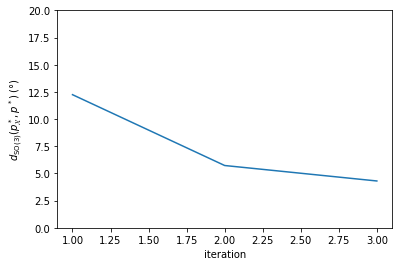

In [5]:
logger.info("Start Postprocessing")
# Postprocessing
post_processing(exp=exp,
                mr_repeat=mr_repeat,
                hist_range=20,
              #  results_folder=results_folder #?
               )
